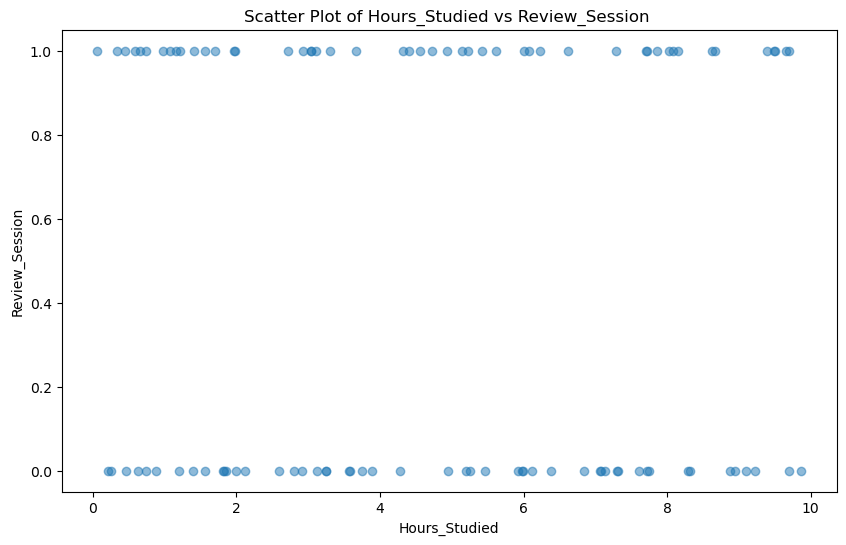

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/rajgo/Downloads/student_data.csv')

# Assuming you have columns "Age" and "Score" for the scatter plot
age = df['Hours_Studied']
score = df['Review_Session']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, score, alpha=0.5)
plt.xlabel("Hours_Studied")
plt.ylabel("Review_Session")
plt.title("Scatter Plot of Hours_Studied vs Review_Session ")

# Show the plot
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('C:/Users/rajgo/Downloads/student_data.csv')

# Assuming you have features and target variable, e.g., "Age" and "Pass" where "Pass" is binary (1 for pass, 0 for fail)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy:  0.85
Confusion Matrix:
 [[ 5  1]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



In [16]:
# Assuming you have features and a target variable in your dataset
# Assuming you have features and a target variable in your dataset
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']



C:\Users\rajgo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rajgo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


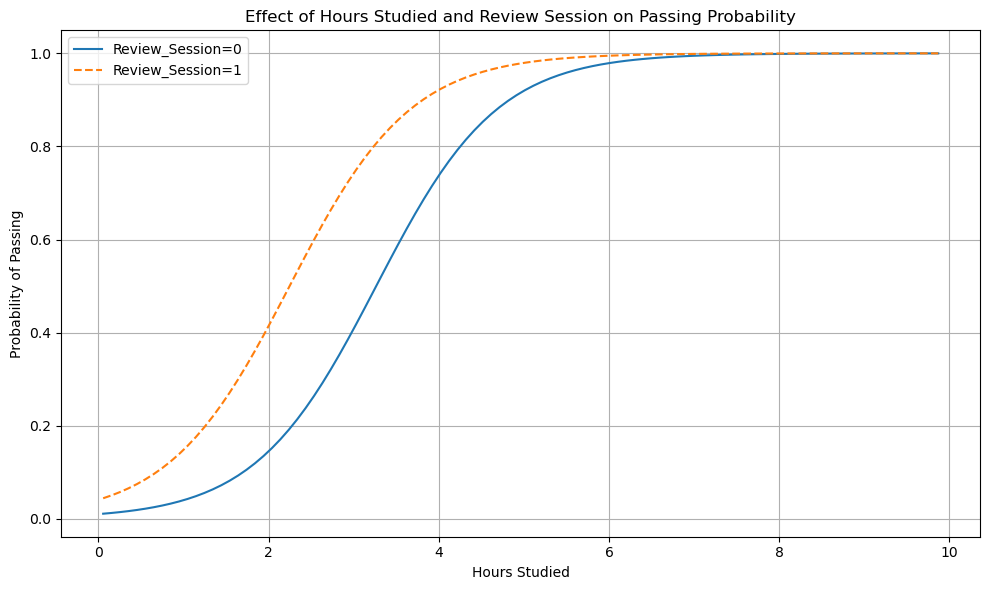

In [19]:
# Create a range of hours studied values for prediction
hours_studied_range = np.linspace(data['Hours_Studied'].min(), data['Hours_Studied'].max(), 100)

# Predict probabilities for each value in the range with both Review_Session values
# Assuming 'Review_Session' values of 0 and 1
probabilities = model.predict_proba(np.column_stack((hours_studied_range, np.zeros(100))))
probabilities_1 = model.predict_proba(np.column_stack((hours_studied_range, np.ones(100))))

# Extract probability values for each class
probability_0 = probabilities[:, 1]  # Probability of passing when Review_Session=0
probability_1 = probabilities_1[:, 1]  # Probability of passing when Review_Session=1

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_range, probability_0, label='Review_Session=0')
plt.plot(hours_studied_range, probability_1, label='Review_Session=1', linestyle='--')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
Coefficients: [[1.40365599 1.42846816]]
Intercept: [-4.58136123]
Accuracy: 0.85
AUC (Area Under the ROC Curve): 0.9642857142857144


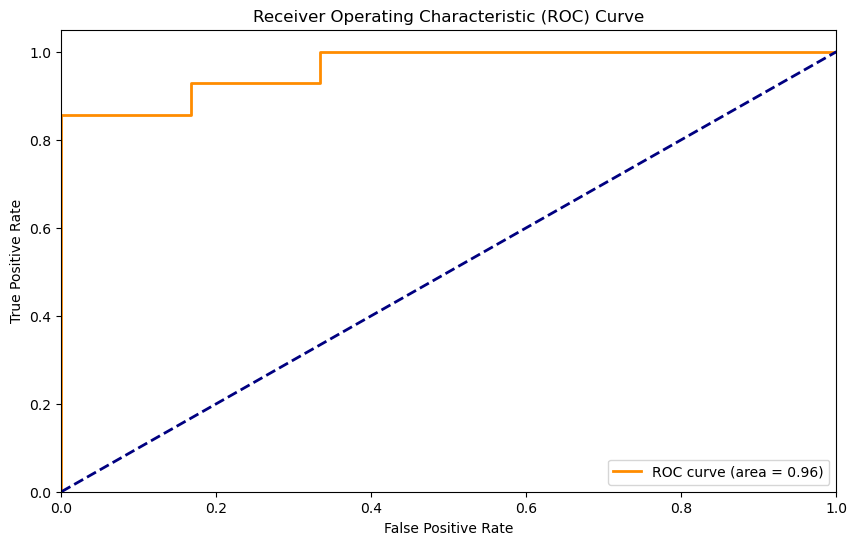

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/rajgo/Downloads/student_data.csv')

# Assuming 'Age' is a feature and 'Pass' is the target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Output model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC and plot the ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC (Area Under the ROC Curve):", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Load the dataset
df = pd.read_csv('C:/Users/rajgo/Downloads/student_data.csv')

# Assuming you have features and a target variable, e.g., 'Age' as a feature and 'Pass' as the binary target (1 for pass, 0 for fail)
X = data.drop(columns=['Results'])  # Features
y = data['Results']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit an SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9
Confusion Matrix:
 [[ 6  0]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.86      0.92        14

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('C:/Users/rajgo/Downloads/student_data.csv')

# Assuming you have features and a target variable
X = data.drop(columns=['Results'])  # Features
y = data['Results']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for the grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

# Create an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf')

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best SVM model with the best parameters
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters: {'C': 1, 'gamma': 1}
Accuracy: 0.85
